<a href="https://colab.research.google.com/github/rochismandatta/Zindi.africa/blob/master/Zindi_Insurance_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 64kB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
import io
#uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [ ]:
df2.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
df2['8NN1'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
29127    False
29128    False
29129    False
29130    False
29131    False
Name: 8NN1, Length: 29132, dtype: bool

In [ ]:
#df2.loc[df2['8NN1'] == 1, "8NN1"] = "8NN1"

In [ ]:
df2[df2['8NN1'] != 0]

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
5,2ZFEPSR,1/9/2010,F,U,1981,748L,0OJM,T4MS,0,1,8NN1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,RYH54X3,1/1/2015,M,U,1978,748L,0OJM,T4MS,0,0,8NN1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
115,IE6553W,1/7/2010,M,M,1956,E5SW,N2ZZ,90QI,0,0,8NN1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
127,RNUDNX7,1/7/2012,M,U,1974,XX25,0OJM,T4MS,0,0,8NN1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
136,VYIT1Z8,1/12/2019,M,U,1974,E5SW,0OJM,T4MS,0,0,8NN1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28240,4K3Z6KY,1/9/2012,M,U,1982,XX25,0OJM,T4MS,0,1,8NN1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28327,FC0HIRC,1/9/2010,M,U,1984,748L,E39I,90QI,0,0,8NN1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
28367,AUFDDXJ,1/1/2015,M,M,1978,X23B,0B60,JD7X,1,1,8NN1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,1
28554,SVTC2YK,1/5/2015,M,U,1985,748L,6E4H,90QI,0,0,8NN1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2['join_date'] = pd.to_datetime(df2['join_date'], errors='coerce')
df2['Age']=(df2['join_date'].dt.year-df2['birth_year'])


In [ ]:
df2.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,Age
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,32.0
1,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,38.0
2,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,22.0
3,2S9E81J,2019-01-08,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,29.0
4,BHDYVFT,2019-01-08,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,29.0


In [ ]:
df = df2

In [ ]:
X = df2[['sex','marital_status','birth_year','branch_code','occupation_code','occupation_category_code','Age']]

In [ ]:
## KMeans, Mean Shift to follow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [ ]:
import io
#uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [ ]:
df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,01-02-2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,RVSZ,0,0,0,0,0,0,K6QO,0,0,0,0,0,0
1,CP5S02H,01-06-2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,RVSZ,0,0,0,0,0,0,K6QO,0,0,0,0,0,0
2,2YKDILJ,01-06-2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,SOP4,RVSZ,0,0,0,0,0,0,0,0,0,0,0,0,ECY3
3,2S9E81J,01-08-2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,RVSZ,0,0,0,0,0,0,K6QO,0,0,0,0,0,0
4,BHDYVFT,01-08-2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,JZ9D,J9JW,0,0


In [ ]:
df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')
df['Age']=(df['join_date'].dt.year-df['birth_year'])
df['Join Year'] = df['join_date'].dt.year
df['Join Month']  = df['join_date'].dt.strftime('%b')
df['Weekday'] = df['join_date'].dt.weekday
df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,Age,Join Year,Join Month,Weekday
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,RVSZ,0,0,0,0,0,0,K6QO,0,0,0,0,0,0,32.0,2019.0,Jan,2.0
1,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,RVSZ,0,0,0,0,0,0,K6QO,0,0,0,0,0,0,38.0,2019.0,Jan,6.0
2,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,SOP4,RVSZ,0,0,0,0,0,0,0,0,0,0,0,0,ECY3,22.0,2013.0,Jan,6.0
3,2S9E81J,2019-01-08,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,RVSZ,0,0,0,0,0,0,K6QO,0,0,0,0,0,0,29.0,2019.0,Jan,1.0
4,BHDYVFT,2019-01-08,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,JZ9D,J9JW,0,0,29.0,2019.0,Jan,1.0


In [ ]:
df = df[~df['join_date'].isnull()]

In [ ]:
df.columns

Index(['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',
       'Age', 'Join Year', 'Join Month', 'Weekday'],
      dtype='object')

In [ ]:
y = df.

SyntaxError: ignored

In [ ]:
X = df.drop(columns = ['ID','join_date', 'P5DA', 'RIBP', '8NN1', \
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', \
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'])
y = df[['P5DA', 'RIBP', '8NN1', \
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', \
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',]]

In [ ]:
X.head()

,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,Age,Join Year,Join Month,Weekday
0,F,M,1987,1X1H,2A7I,T4MS,32.0,2019.0,Jan,2.0
1,F,M,1981,UAOD,2A7I,T4MS,38.0,2019.0,Jan,6.0
2,M,U,1991,748L,QZYX,90QI,22.0,2013.0,Jan,6.0
3,M,M,1990,1X1H,BP09,56SI,29.0,2019.0,Jan,1.0
4,M,M,1990,748L,NO3L,T4MS,29.0,2019.0,Jan,1.0


In [ ]:
from sklearn import preprocessing

In [ ]:
list(set(X['sex']))

['F', 'M']

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(list(set(X['sex'])))
print(le.classes_)
X["sex_l"] = le.transform(X['sex'])

['F' 'M']


In [ ]:
for i in ["marital_status",	"branch_code",	"occupation_category_code",	"Join Month"]:
  print(i)
  le = preprocessing.LabelEncoder()
  le.fit(list(set(X[i])))
  print(le.classes_)
  X[i+"_l"] = le.transform(X[i])

marital_status
['D' 'M' 'P' 'R' 'S' 'U' 'W' 'f']
branch_code
['1X1H' '30H5' '49BM' '748L' '94KC' '9F9T' 'BOAS' 'E5SW' 'EU3L' 'O4JC'
 'O67J' 'UAOD' 'X23B' 'XX25' 'ZFER']
occupation_category_code
['56SI' '90QI' 'AHH5' 'JD7X' 'L44T' 'T4MS']
Join Month
['Aug' 'Feb' 'Jan' 'Jul' 'Jun' 'May' 'Nov' 'Oct']


In [ ]:
X.head(5)

,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,Age,Join Year,Join Month,Weekday,sex_l,marital_status_l,branch_code_l,occupation_category_code_l,Join Month_l
0,F,M,1987,1X1H,2A7I,T4MS,32.0,2019.0,Jan,2.0,0,1,0,5,2
1,F,M,1981,UAOD,2A7I,T4MS,38.0,2019.0,Jan,6.0,0,1,11,5,2
2,M,U,1991,748L,QZYX,90QI,22.0,2013.0,Jan,6.0,1,5,3,1,2
3,M,M,1990,1X1H,BP09,56SI,29.0,2019.0,Jan,1.0,1,1,0,0,2
4,M,M,1990,748L,NO3L,T4MS,29.0,2019.0,Jan,1.0,1,1,3,5,2


In [ ]:

le = preprocessing.LabelEncoder()
le.fit(list(set(X["occupation_code"])))
print(le.classes_)
X["occupation_code_l"] = le.transform(X['occupation_code'])

['00MO' '0B60' '0KID' '0OJM' '0PO7' '0S50' '0SH6' '0VYC' '1AN5' '1DT6'
 '1H8Y' '1MB4' '1MSV' '1NFK' '1YKL' '2346' '2686' '2A7I' '2BE6' '2G86'
 '2HLT' '2JHV' '2MBB' '2R78' '2US6' '2XZ1' '2YAO' '31GG' '31JW' '374O'
 '3NHZ' '3X46' '3YQ1' '44SU' '4M0E' '4W0D' '59QM' '5FPK' '5JRZ' '5LNN'
 '5OVC' '6E4H' '6KYM' '6LKA' '6PE7' '6SKY' '6XXU' '6YZA' '734F' '738L'
 '73AC' '74BF' '7G9M' '7KM4' '7UDQ' '7UHW' '7UWC' '820B' '834U' '8HRZ'
 '8Y24' '9B5B' '9FA1' '9HD1' '9IM8' '9IP9' 'A4ZC' 'A793' 'AIDS' 'AIIN'
 'APO0' 'AQIB' 'B3QW' 'B8W8' 'BER4' 'BFD1' 'BP09' 'BPSA' 'BWBW' 'BX9E'
 'C1E3' 'C8F6' 'CAAV' 'CEL6' 'CV2C' 'CYDC' 'DD8W' 'DE5D' 'DHSN' 'DPRV'
 'DZRV' 'E39I' 'E5PF' 'EE5R' 'F35Z' 'F57O' 'FJBW' 'FLNZ' 'FLXH' 'FSWO'
 'FSXG' 'GQ0N' 'GVZ1' 'GWEP' 'GZA8' 'H1K7' 'HAXM' 'HJF4' 'HSVE' 'HTQS'
 'I2OD' 'I31I' 'IE90' 'IJ01' 'IMHI' 'INEJ' 'IQFS' 'IUT9' 'IX8T' 'IZ77'
 'J9SY' 'JHU5' 'JI64' 'JN20' 'JQH3' 'JS7M' 'JSAX' 'JUIP' 'K0DL' 'K5GV'
 'K5LB' 'KBWO' 'KNVN' 'KPG9' 'KUPK' 'L1P3' 'L4PL' 'LAYD' 'LGTN' 'LLLH'
 'LQ0W

In [ ]:
X["occupation_code"].replace(X["occupation_code"].unique(),[i for i in range(1,1+len(X["occupation_code"].unique()))],inplace = True)

In [ ]:
X["sex_l"]

0        0
1        0
2        1
3        1
4        1
        ..
29127    0
29128    1
29129    1
29130    1
29131    1
Name: sex_l, Length: 29130, dtype: int64

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(list(set(y)))
print(le.classes_)
y1 = le.transform(y)

['66FJ' '7POT' '8NN1' 'AHXO' 'BSTQ' 'ECY3' 'FM3X' 'GHYX' 'GYSR' 'J9JW'
 'JWFN' 'JZ9D' 'K6QO' 'LJR9' 'N2MW' 'P5DA' 'PYUQ' 'QBOL' 'RIBP' 'RVSZ'
 'SOP4']


ValueError: ignored

In [ ]:
y1

NameError: ignored

In [ ]:
X.dtypes

sex                            object
marital_status                 object
birth_year                      int64
branch_code                    object
occupation_code                 int64
occupation_category_code       object
Age                           float64
Join Year                     float64
Join Month                     object
Weekday                       float64
sex_l                           int64
marital_status_l                int64
branch_code_l                   int64
occupation_category_code_l      int64
Join Month_l                    int64
occupation_code_l               int64
dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
X.head()

,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,Age,Join Year,Join Month,Weekday,sex_l,marital_status_l,branch_code_l,occupation_category_code_l,Join Month_l,occupation_code_l
0,F,M,1987,1X1H,2A7I,T4MS,32.0,2019.0,Jan,2.0,0,1,0,5,2,17
1,F,M,1981,UAOD,2A7I,T4MS,38.0,2019.0,Jan,6.0,0,1,11,5,2,17
2,M,U,1991,748L,QZYX,90QI,22.0,2013.0,Jan,6.0,1,5,3,1,2,176
3,M,M,1990,1X1H,BP09,56SI,29.0,2019.0,Jan,1.0,1,1,0,0,2,76
4,M,M,1990,748L,NO3L,T4MS,29.0,2019.0,Jan,1.0,1,1,3,5,2,148


In [ ]:
X1 = X[['sex_l','marital_status_l','branch_code_l','occupation_category_code_l','Join Month_l','occupation_code_l','birth_year','Age','Join Year']]
X1.head()

,sex_l,marital_status_l,branch_code_l,occupation_category_code_l,Join Month_l,occupation_code_l,birth_year,Age,Join Year
0,0,1,0,5,2,17,1987,32.0,2019.0
1,0,1,11,5,2,17,1981,38.0,2019.0
2,1,5,3,1,2,176,1991,22.0,2013.0
3,1,1,0,0,2,76,1990,29.0,2019.0
4,1,1,3,5,2,148,1990,29.0,2019.0


In [ ]:
y.columns

Index(['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ',
       'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D',
       'J9JW', 'GHYX', 'ECY3'],
      dtype='object')

In [ ]:
for i in list(set(y)):
  idx = y==i

In [ ]:
X1 = StandardScaler().fit(X1).transform(X1.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.1)

In [ ]:
y.unique()
X1

AttributeError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors = len(y.unique())).fit(X_train,y_train)
print('KNN')
y_hat = knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test, y_hat))

AttributeError: ignored

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_hat =  LR.predict(X_test)
print('Logistic Regression')
print("LR Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test,y_hat))

Logistic Regression
LR Accuracy:  0.38040693293142425
F1 Score
0.23726853757219915
Jaccard
0.38040693293142425


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Feature: 0, Score: 0.10217
Feature: 1, Score: 0.43963
Feature: 2, Score: -0.08300
Feature: 3, Score: -0.00541
Feature: 4, Score: -0.06395
Feature: 5, Score: -0.11059
Feature: 6, Score: -0.06129
Feature: 7, Score: 0.02825
Feature: 8, Score: -0.15918


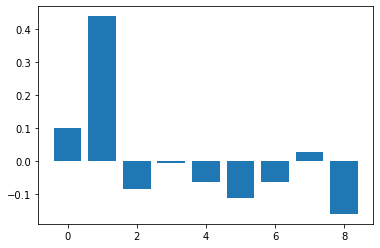

In [ ]:
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_hat = dt.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

DecisionTrees's Accuracy:  0.07159005275056518
F1 Score
0.06800404526187358
Jaccard Similarity
0.07159005275056518


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
clf = GradientBoostingClassifier(random_state=4).fit(X_train,y_train)
print('XGBoost')
y_hat = clf.predict(X_test)
print("XGBoost's Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test,y_hat))

XGBoost
XGBoost's Accuracy:  0.3780708364732479
F1 Score
0.3228742227380407
Jaccard Similarity
0.3780708364732479


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
y.dtypes

P5DA    object
RIBP    object
8NN1    object
7POT    object
66FJ    object
GYSR    object
SOP4    object
RVSZ    object
PYUQ    object
LJR9    object
N2MW    object
AHXO    object
BSTQ    object
FM3X    object
K6QO    object
QBOL    object
JWFN    object
JZ9D    object
J9JW    object
GHYX    object
ECY3    object
dtype: object

In [ ]:
y.loc[y["8NN1"] == "8NN1","8NN1"] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
y["8NN1"] = y["8NN1"].astype(int)

ValueError: ignored

In [ ]:
from catboost import CatBoostClassifier


In [ ]:
#model_dict ={}
model_dict = {}
for i in y.columns:
  #i = "8NN1"
  print(i)
  X_train = X1
  y_train = y[i]

  CB =  CatBoostClassifier(verbose=0, n_estimators=100).fit(X_train,y_train)

  #clf = GradientBoostingClassifier(random_state=4).fit(X_train,y_train)
  model_dict[i] = CB


P5DA
RIBP
8NN1
7POT
66FJ
GYSR
SOP4
RVSZ
PYUQ
LJR9
N2MW
AHXO
BSTQ
FM3X
K6QO
QBOL
JWFN
JZ9D
J9JW
GHYX
ECY3


Test

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Test.csv to Test.csv


In [ ]:
import io
#uploaded = files.upload()
df3 = pd.read_csv(io.BytesIO(uploaded['Test.csv']))

In [ ]:
df3['join_date'] = pd.to_datetime(df3['join_date'], errors='coerce')
df3['Age']=(df3['join_date'].dt.year-df3['birth_year'])
df3['Join Year'] = df3['join_date'].dt.year
df3['Join Month']  = df3['join_date'].dt.strftime('%b')
df3['Weekday'] = df3['join_date'].dt.weekday
df3.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,Age,Join Year,Join Month,Weekday
0,F86J5PC,2018-01-12,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,34.0,2018.0,Jan,4.0
1,H6141K3,2019-01-10,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,23.0,2019.0,Jan,3.0
2,RBAYUXZ,2020-01-01,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,52.0,2020.0,Jan,2.0
3,KCBILBQ,2019-01-02,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,2019.0,Jan,2.0
4,LSEC1ZJ,2020-01-02,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38.0,2020.0,Jan,3.0


In [ ]:
X_test = df3.drop(columns = ['ID','join_date', 'P5DA', 'RIBP', '8NN1', \
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', \
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'])
y_test = df3[['P5DA', 'RIBP', '8NN1', \
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', \
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',]]

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(list(set(X_test['sex'])))
print(le.classes_)
X_test["sex_l"] = le.transform(X_test['sex'])

['F' 'M']


In [ ]:
for i in ["marital_status",	"branch_code",	"occupation_category_code",	"Join Month"]:
  print(i)
  le = preprocessing.LabelEncoder()
  le.fit(list(set(X_test[i])))
  print(le.classes_)
  X_test[i+"_l"] = le.transform(X_test[i])

marital_status
['D' 'F' 'M' 'P' 'R' 'S' 'U' 'W']
branch_code
['1X1H' '30H5' '49BM' '748L' '94KC' '9F9T' 'BOAS' 'E5SW' 'EU3L' 'O4JC'
 'O67J' 'UAOD' 'X23B' 'XX25' 'ZFER']
occupation_category_code
['56SI' '90QI' 'AHH5' 'JD7X' 'L44T' 'T4MS']
Join Month
['Feb' 'Jan' 'Jul' 'Oct' 'nan']


ValueError: ignored

In [ ]:
X_test.head(5)

,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,Age,Join Year,Join Month,Weekday,sex_l,marital_status_l,branch_code_l,occupation_category_code_l,Join Month_l
0,M,M,1984,94KC,DZRV,90QI,35,2019,Jan,2,1,2,4,1,0
1,M,M,1996,1X1H,J9SY,90QI,23,2019,Jan,6,1,2,0,1,0
2,F,W,1968,UAOD,2A7I,T4MS,45,2013,Jan,6,0,7,11,5,0
3,M,M,1989,94KC,2A7I,T4MS,30,2019,Jan,1,1,2,4,5,0
4,F,M,1982,UAOD,0KID,T4MS,37,2019,Jan,1,0,2,11,5,0


In [ ]:

le = preprocessing.LabelEncoder()
le.fit(list(set(X_test["occupation_code"])))
print(le.classes_)
X_test["occupation_code_l"] = le.transform(X_test['occupation_code'])

['00MO' '0B60' '0FOI' '0KID' '0OJM' '0PO7' '0S50' '0SH6' '0VYC' '0ZND'
 '1AN5' '1DT6' '1H8Y' '1MB4' '1MSV' '1NFK' '1YKL' '2346' '2A7I' '2BE6'
 '2G86' '2HLT' '2JHV' '2MBB' '2R78' '2YAO' '31GG' '31JW' '3NHZ' '3X46'
 '44SU' '4M0E' '4W0D' '5FPK' '5JRZ' '5OVC' '6E4H' '6KYM' '6LKA' '6PE7'
 '6YZA' '734F' '73AC' '74BF' '7G9M' '7KM4' '7UDQ' '7UHW' '7UWC' '820B'
 '834U' '8CHJ' '8Y24' '93OJ' '9F96' '9FA1' '9HD1' '9IM8' '9IP9' 'A793'
 'AIDS' 'AIIN' 'APO0' 'AQIB' 'B3QW' 'B8W8' 'BIA0' 'BP09' 'BPSA' 'BWBW'
 'BX9E' 'C1E3' 'C8F6' 'CEL6' 'CV2C' 'CYDC' 'DD8W' 'DE5D' 'DPRV' 'DZRV'
 'E2MJ' 'E39I' 'EE5R' 'F35Z' 'F57O' 'FJBW' 'FLNZ' 'FSWO' 'FSXG' 'GQ0N'
 'GVZ1' 'GWEP' 'H1K7' 'HAXM' 'HJF4' 'HSI5' 'HTQS' 'I2OD' 'I31I' 'IJ01'
 'IQFS' 'IUT9' 'IZ77' 'J9SY' 'JBJP' 'JHU5' 'JI64' 'JN20' 'JS7M' 'K0DL'
 'K5GV' 'K5LB' 'KNVN' 'KPG9' 'L1P3' 'L4PL' 'LAYD' 'LQ0W' 'MU16' 'N2ZZ'
 'N7K2' 'NFJH' 'NO3L' 'NQW1' 'NSJX' 'NX5Y' 'OEH6' 'OME4' 'OPVX' 'OYQF'
 'P2K2' 'P4MD' 'PKW3' 'PMAI' 'PWCW' 'Q231' 'Q2L0' 'Q57T' 'Q6J6' 'QJID'
 'QQVA

In [ ]:
X_test1 = X_test[['sex_l','marital_status_l','branch_code_l','occupation_category_code_l','Join Month_l','occupation_code_l','birth_year','Age','Join Year']]
X_test1.head()

,sex_l,marital_status_l,branch_code_l,occupation_category_code_l,Join Month_l,occupation_code_l,birth_year,Age,Join Year
0,1,2,4,1,0,79,1984,35,2019
1,1,2,0,1,0,103,1996,23,2019
2,0,7,11,5,0,18,1968,45,2013
3,1,2,4,5,0,18,1989,30,2019
4,0,2,11,5,0,3,1982,37,2019


In [ ]:
X_test1 = StandardScaler().fit(X_test1).transform(X_test1.astype(float))

In [ ]:
insu_dict = {}
for i in y_test.columns:
#i= "P5DA"
  print(i)
  clf = model_dict[i]
  y_hat = clf.predict(X_test1)
  y_test1 = y_test[i]
  print("XGBoost's Accuracy: ", metrics.accuracy_score(y_test1,y_hat))
  print('F1 Score')
  print(f1_score(y_test1,y_hat, average='weighted'))
  print("-----")
  #print('Jaccard Similarity')
  #print(jaccard_similarity_score(y_test1,y_hat))
  insu_dict[i] =  y_test1

P5DA
XGBoost's Accuracy:  0.9991
F1 Score
0.9990500225101294
-----
RIBP
XGBoost's Accuracy:  0.9468
F1 Score
0.9485569242657035
-----
8NN1
XGBoost's Accuracy:  0.9961
F1 Score
0.9944532237863833
-----
7POT
XGBoost's Accuracy:  0.9785
F1 Score
0.9828606239449175
-----
66FJ
XGBoost's Accuracy:  0.9926
F1 Score
0.9889137408411122
-----
GYSR
XGBoost's Accuracy:  0.9996
F1 Score
0.9996999799959991
-----
SOP4
XGBoost's Accuracy:  0.9902
F1 Score
0.987314279971862
-----
RVSZ
XGBoost's Accuracy:  0.4964
F1 Score
0.37749274401849425
-----
PYUQ
XGBoost's Accuracy:  0.9316
F1 Score
0.9225850928762857
-----
LJR9
XGBoost's Accuracy:  0.9696
F1 Score
0.9768857839155158
-----
N2MW
XGBoost's Accuracy:  0.9843
F1 Score
0.9857083167243649
-----
AHXO
XGBoost's Accuracy:  0.9884
F1 Score
0.9876895833593137
-----
BSTQ
XGBoost's Accuracy:  0.9893
F1 Score
0.9851835104022041
-----
FM3X
XGBoost's Accuracy:  0.9967
F1 Score
0.9954520659087494
-----
K6QO
XGBoost's Accuracy:  0.4701
F1 Score
0.4187432174994192
-

In [ ]:

insu_dict_dt = {}
for i in y_test.columns:
#i= "P5DA"
  print(i)
  clf = model_dict_dt[i]
  y_hat = clf.predict(X_test1)
  y_test1 = y_test[i]
  print("XGBoost's Accuracy: ", metrics.accuracy_score(y_test1,y_hat))
  print('F1 Score')
  print(f1_score(y_test1,y_hat, average='weighted'))
  print("-----")
  #print('Jaccard Similarity')
  #print(jaccard_similarity_score(y_test1,y_hat))
  insu_dict_dt[i] =  y_test1

P5DA
XGBoost's Accuracy:  0.9978
F1 Score
0.9984408957415566
-----
RIBP
XGBoost's Accuracy:  0.9388
F1 Score
0.945688626824585
-----
8NN1
XGBoost's Accuracy:  0.9912
F1 Score
0.9920760220994475
-----
7POT
XGBoost's Accuracy:  0.9499
F1 Score
0.9680708138878917
-----
66FJ
XGBoost's Accuracy:  0.9828
F1 Score
0.9845404958587988
-----
GYSR
XGBoost's Accuracy:  0.9999
F1 Score
0.9998500025001251
-----
SOP4
XGBoost's Accuracy:  0.9836
F1 Score
0.9848362394902671
-----
RVSZ
XGBoost's Accuracy:  0.5026
F1 Score
0.4287722341764034
-----
PYUQ
XGBoost's Accuracy:  0.8854
F1 Score
0.899996654647436
-----
LJR9
XGBoost's Accuracy:  0.9642
F1 Score
0.9741574066530889
-----
N2MW
XGBoost's Accuracy:  0.9299
F1 Score
0.9527396975317746
-----
AHXO
XGBoost's Accuracy:  0.9854
F1 Score
0.987632183908046
-----
BSTQ
XGBoost's Accuracy:  0.9767
F1 Score
0.9787027769471186
-----
FM3X
XGBoost's Accuracy:  0.993
F1 Score
0.9935978926241845
-----
K6QO
XGBoost's Accuracy:  0.4827
F1 Score
0.45655478338883565
----

In [ ]:
insu_dict

{'66FJ': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: 66FJ, Length: 10000, dtype: int64, '7POT': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: 7POT, Length: 10000, dtype: int64, '8NN1': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: 8NN1, Length: 10000, dtype: int64, 'AHXO': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: AHXO, Length: 10000, dtype: int64, 'BSTQ': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: BSTQ, Length: 10000, dtype: int64, 'ECY3': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    0
 9998    0
 9999    0
 Name: ECY3, Length: 

In [ ]:
_test_df = pd.DataFrame(insu_dict)

In [ ]:
_test_df

,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
_test_df["ID"] = df3.ID

In [ ]:
_test_df

,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,ID
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F86J5PC
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,H6141K3
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,RBAYUXZ
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,KCBILBQ
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,LSEC1ZJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0GMU5UH
9996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,I9W11CD
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,42WTEGT
9998,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8EKC4O9


In [ ]:
_test_df.to_csv("InsuRecoGB_test.csv", header = True, index = False)

In [ ]:
files.download('InsuRecoGB_test.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
_test_df.columns


Index(['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ',
       'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D',
       'J9JW', 'GHYX', 'ECY3', 'ID'],
      dtype='object')

In [ ]:
_formated_test = pd.melt(_test_df, id_vars = ['ID'], value_vars= ['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ',
       'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D',
       'J9JW', 'GHYX', 'ECY3'])

In [ ]:
_formated_test[_formated_test.value == 1]

,ID,variable,value
1035,CY4JQXY,P5DA,1
3260,SGF4WLB,P5DA,1
3996,GWOS5VR,P5DA,1
7270,F2CAR2H,P5DA,1
7272,SKO7PQ6,P5DA,1
...,...,...,...
209775,D5T5S5Y,ECY3,1
209780,BBU77MQ,ECY3,1
209831,6AQCSBO,ECY3,1
209890,I91WJZX,ECY3,1


In [ ]:
_formated_test["ID X PCODE"]  = _formated_test.ID + " X " + _formated_test.variable

In [ ]:
_formated_test["Label"]  = _formated_test.value

In [ ]:
_formated_test[["ID X PCODE","Label"]].to_csv("InsuReco_GB_v1.csv", header =True, index = False)

In [ ]:
from google.colab import files
files.download('InsuReco_GB_v1.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.0376689  0.32925013 0.18656185 0.04862834 0.04478461 0.05737804
 0.05415557 0.04299894 0.19857368]


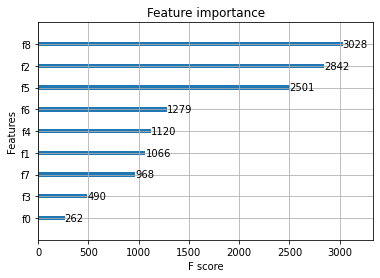

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
clf = XGBClassifier(random_state=4).fit(X_train,y_train)
print(clf.feature_importances_)


plot_importance(clf)

plt.show()

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=4).fit(X_train,y_train)
print('Random Forest')
y_hat = clf.predict(X_test)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test,y_hat ))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

Random Forest
Random Forest's Accuracy:  0.3510926902788244
F1 Score
0.2429278247227917
Jaccard Similarity
0.3510926902788244


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 
y_hat =clf.predict(X_test)
print('SVM')
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

SVM
SVM's Accuracy:  0.3851544837980407
F1 Score
0.22331550443069087
Jaccard Similarity
0.3851544837980407


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
